In [1]:
from ggplot import *
import pandas as pd
import numpy as np

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("./baseball-pitches-clean.csv")
df = df[['pitch_time', 'inning', 'pitcher_name', 'hitter_name', 'pitch_type', 
         'px', 'pz', 'pitch_name', 'start_speed', 'end_speed', 'type_confidence']]
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.545,3.069,Fastball,93.4,85.6,0.895
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.120,1.826,Slider,89.1,82.8,0.931
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,-0.229,1.667,Slider,90.0,83.3,0.926
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,-1.917,0.438,Slider,87.7,81.6,0.915


## Getting a feel for what's going on

### `geom_point`

I usually start by making some really simple plots like scatterplots and histograms just to make sure that things make sense.

`px` and `pz` are the coordinates of a pitch as they cross home plate. Let's plot these and see if our data makes sense.

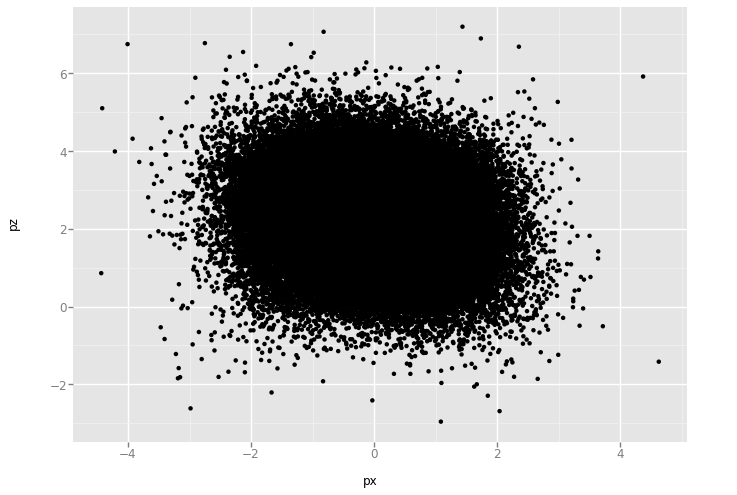

<ggplot: (2932097642188)>

In [6]:
ggplot(df, aes(x='px', y='pz')) + geom_point()

What about the pitch speed?

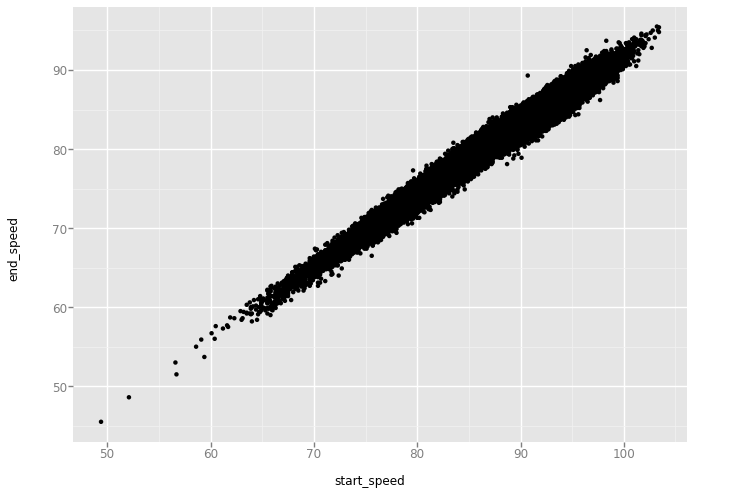

<ggplot: (2932098212728)>

In [7]:
ggplot(aes(x='start_speed', y='end_speed'), data=df) + geom_point()

### `geom_hist`

A better way to inspect pitch speed might be to look at a distribution of the data.

Does this make sense? Let's consult the source of all true wisdom:
    https://answers.yahoo.com/question/index?qid=20080126131031AAwVCNk

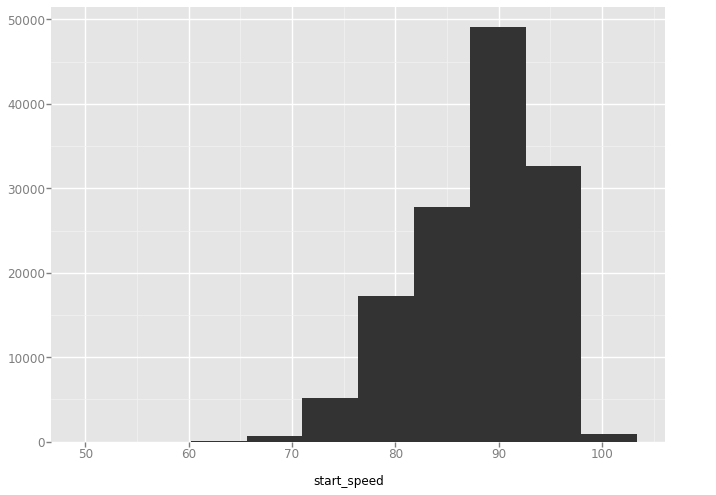

<ggplot: (2932098708579)>

In [8]:
ggplot(df, aes(x='start_speed')) + geom_histogram()

What about for specific pitches?

In [12]:
for name, frame in df.groupby("pitch_name"):
    ggplot(aes(x='start_speed'), data=frame) + geom_histogram() + ggtitle("Distribution of " + str(name))

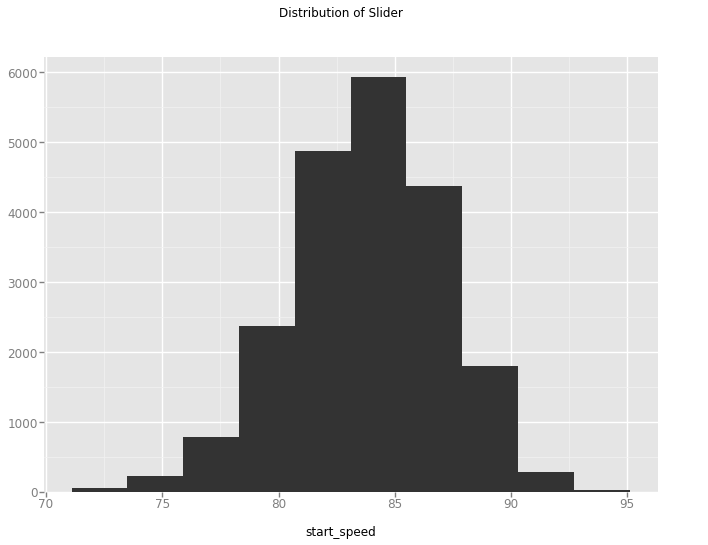

<ggplot: (2932098233548)>

In [13]:
ggplot(aes(x='start_speed'), data=frame) + geom_histogram() + ggtitle("Distribution of " + str(name))

That was helpful but I'm sort of on plot overload now.

### `facet_wrap` FTW
__Use the trellis__.

"Trellis Graphics is a family of techniques for viewing complex, multi-variable data sets."
[Read more here](https://www.stat.auckland.ac.nz/~ihaka/787/lectures-trellis.pdf).

In [15]:
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.545,3.069,Fastball,93.4,85.6,0.895
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.120,1.826,Slider,89.1,82.8,0.931
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,-0.229,1.667,Slider,90.0,83.3,0.926
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,-1.917,0.438,Slider,87.7,81.6,0.915


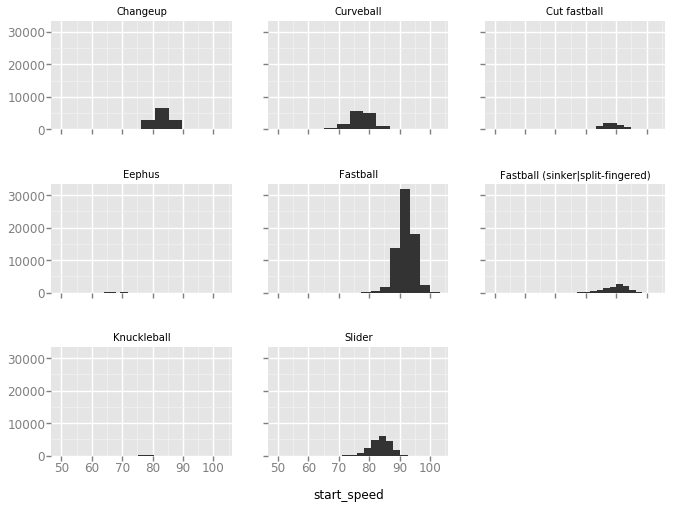

<ggplot: (-9223369104755004535)>

In [14]:
ggplot(aes(x='start_speed'), data=df) +\
    geom_histogram() +\
    facet_wrap('pitch_name')

### Changeup, Curveball, Cut Fastball, Eephus....Wait, what?

http://en.wikipedia.org/wiki/Eephus_pitch

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo("ikLlRT2j7EQ")

Ok so what about balls and strikes.

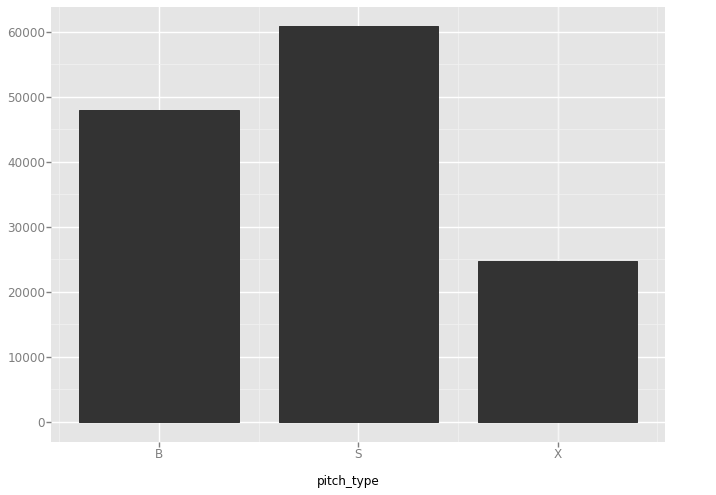

<ggplot: (-9223369104755397411)>

In [19]:
ggplot(aes(x='pitch_type'), data=df) + geom_bar()

### `facet_grid`
(facet_wraps brother)

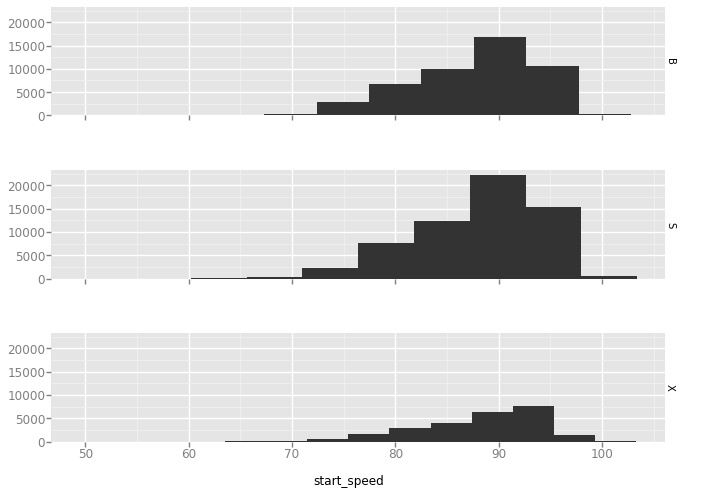

<ggplot: (-9223369104755382959)>

In [21]:
ggplot(aes(x='start_speed'), data=df) +\
    geom_histogram() +\
    facet_grid('pitch_type')

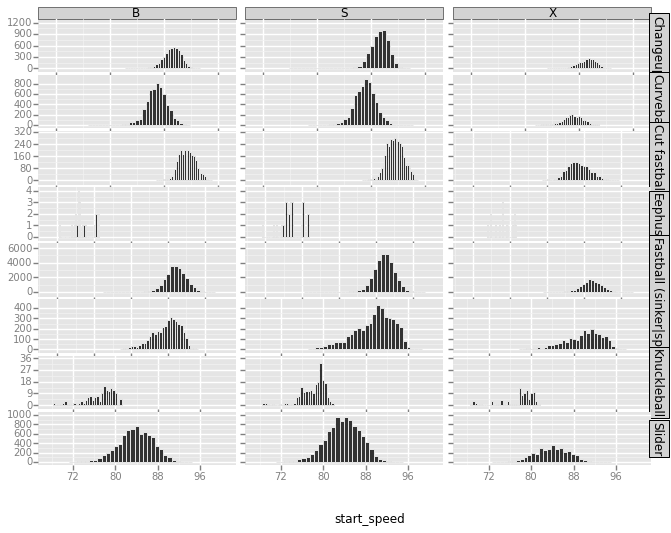

<ggplot: (271338625)>

In [12]:
ggplot(aes(x='start_speed'), data=df) +\
    geom_histogram() +\
    facet_grid('pitch_name', 'pitch_type', scales="free")

### `geom_density`
Similar to `geom_histogram` but relative y scale.

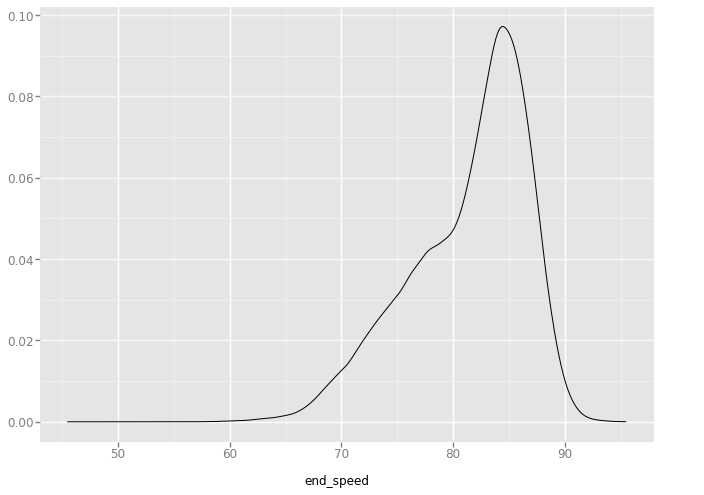

<ggplot: (-9223369104742597025)>

In [22]:
ggplot(df, aes(x='end_speed')) +\
    geom_density()

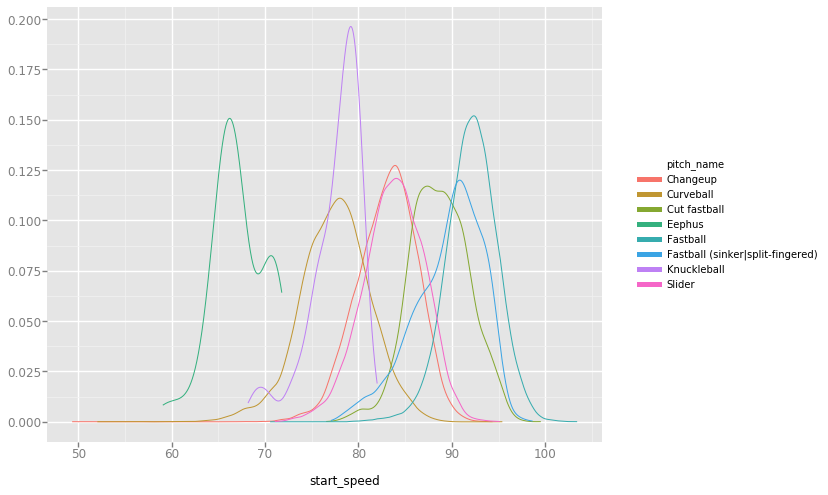

<ggplot: (2932112403902)>

In [23]:
ggplot(df, aes(x='start_speed', color='pitch_name')) +\
    geom_density()